In [61]:
import moments
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

In [3]:
data_dir = "/home/davidb/DEST2_data/"
sfs_file = data_dir + "k4_Transatlantic.npy"

In [4]:
sfs = moments.Spectrum(np.load(sfs_file))

In [15]:
sfs.pop_ids = ["Americas", "Europe_east", "Europe_west", "Guinea", "Zambia"]
sfs.marginalize([2, 4]).S()

204980.1644277571

In [20]:
sfs.Fst(pairwise=True)

{('Americas', 'Europe_east'): 0.06713928503578044,
 ('Americas', 'Europe_west'): 0.04701276029466228,
 ('Americas', 'Guinea'): 0.25118389150933174,
 ('Americas', 'Zambia'): 0.17896891212833949,
 ('Europe_east', 'Europe_west'): 0.03919972900132188,
 ('Europe_east', 'Guinea'): 0.31951081834617306,
 ('Europe_east', 'Zambia'): 0.23855926662255333,
 ('Europe_west', 'Guinea'): 0.29817605900932076,
 ('Europe_west', 'Zambia'): 0.2179126497950027,
 ('Guinea', 'Zambia'): 0.18216904668522654}

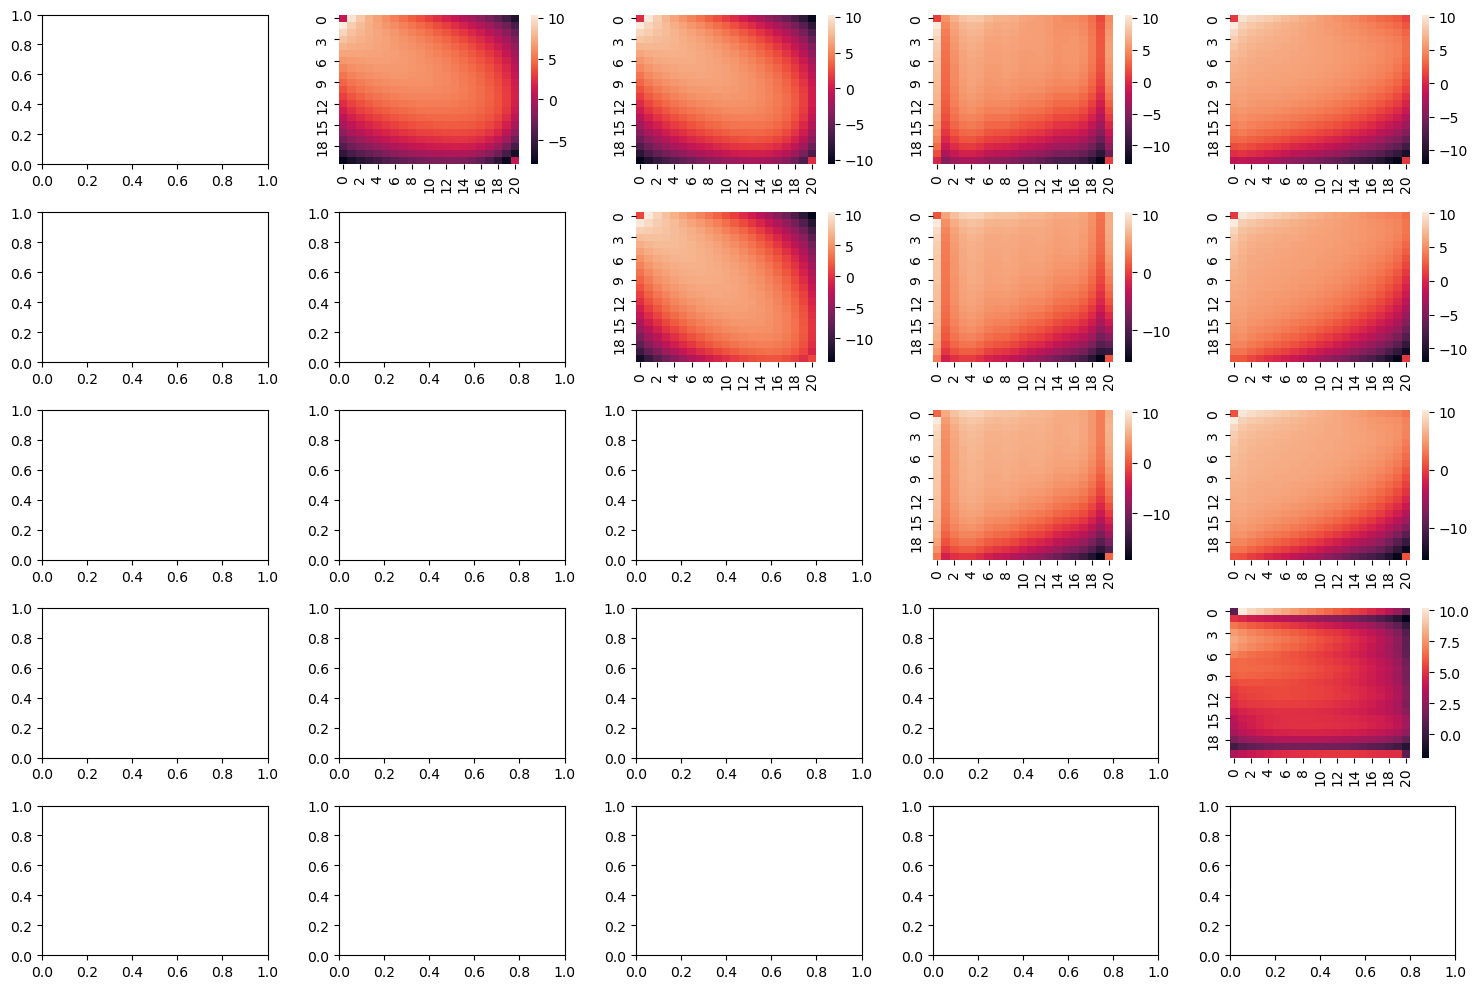

In [64]:
fig, ax = plt.subplots(5, 5, figsize=(15, 10))
for i, j in it.product(range(5), range(5)):
    if i >= j:
        continue
    pops_to_remove = [k for k in range(5) if k not in [i, j]]
    sns.heatmap(np.log(sfs.marginalize(pops_to_remove)), ax=ax[i][j])
plt.tight_layout()
plt.show()